In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
print(type(dir(iris)))

<class 'list'>


In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
iris_data = iris.data
print(iris_data.shape)

(150, 4)


In [6]:
iris_data[0]

array([5.1, 3.5, 1.4, 0.2])

In [7]:
iris_label = iris.target
print(iris_label.shape)

(150,)


In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

150개의 데이터 4개의 data feature, 3개의 타겟라벨종류

In [9]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [10]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
# 데이터셋 저장경로
iris.filename

'/home/jin/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/datasets/data/iris.csv'

In [12]:
import pandas as pd
print(pd.__version__)

1.1.2


In [13]:
type(iris_data)

numpy.ndarray

In [14]:
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

In [15]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
# 정답데이터 추가 (문제지:  feature, 정답지: label, target)
iris_df['label'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


train test split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

In [19]:
print('X_train 개수: ', len(X_train), ', X_test 개수: ', len(X_test))

X_train 개수:  120 , X_test 개수:  30


In [20]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((120, 4), (120,), (30, 4), (30,))

use Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
decision_tree=DecisionTreeClassifier(random_state=32)
print(decision_tree._estimator_type)

classifier


In [23]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=32)

In [24]:
y_pred = decision_tree.predict(X_test)

In [25]:
#모델이 예측한 X_test결과
y_pred

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2])

성능평가

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.91      0.83      0.87        12
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



RandomForest

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=25)

In [32]:
random_forest = RandomForestClassifier(random_state=32)

In [33]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=32)

In [34]:
y_pred = random_forest.predict(X_test)

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      0.92      0.92        13
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



SVM(Support Vector Machine)

In [36]:
from sklearn import svm

In [37]:
# support vector classifier?
svm_model = svm.SVC() 

In [38]:
print(svm_model._estimator_type)

classifier


In [39]:
svm_model.fit(X_train, y_train)

SVC()

In [40]:
svc_pred = svm_model.predict(X_test)

In [41]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        13
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



SGD Classifier (Stochastic Gradient Descent)

In [42]:
from sklearn.linear_model import SGDClassifier

In [43]:
sgd_model = SGDClassifier()

In [44]:
sgd_model.fit(X_train, y_train)

SGDClassifier()

In [45]:
sgd_pred = sgd_model.predict(X_test)

In [46]:
print(classification_report(y_test, sgd_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.71      0.92      0.80        13
           2       0.75      0.38      0.50         8

    accuracy                           0.80        30
   macro avg       0.82      0.77      0.77        30
weighted avg       0.81      0.80      0.78        30



Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

In [48]:
print(logistic_model._estimator_type)

classifier


In [49]:
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        13
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



/home/jin/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [50]:
#스케일러 미사용으로 인한 경고메시지?

## 모델의 평가

### 정확도의 함정

In [51]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [52]:
digits_data = digits.data
digits_data.shape

(1797, 64)

In [53]:
digits_data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

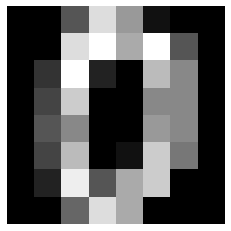

In [54]:
# image 확인
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digits.data[0].reshape(8,8), cmap='gray')
plt.axis('off')
plt.show()

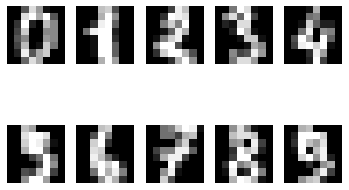

In [55]:
# 여러개 확인
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(digits.data[i].reshape(8,8), cmap='gray')
    plt.axis('off')
plt.show()

In [56]:
# target data 확인
digits_label = digits.target
print(digits_label.shape)
digits_label[:20]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

* 3인지 아닌지 맞추는 문제로 변형(정확도 함정 확인)

In [57]:
new_label = [3 if i ==3 else 0 for i in digits_label]
#???
new_label[:20]

[0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                    new_label,
                                                    test_size=0.2,
                                                    random_state=15)

decision_tree = DecisionTreeClassifier(random_state=15)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9388888888888889

 1~9까지의 숫자중 3일경우 3 / 아닐경우 0으로 변형 <br>
 아닐경우의 비율이 높아짐 >> 데이터 불균형 발생

In [59]:
# y_pred와 같으면서 0으로만 이뤄진 list
fake_pred = [0] * len(y_pred)

accuracy = accuracy_score(y_test, fake_pred)
accuracy

0.925

* 정확도는 **데이터의 분포**에 따라 모델의 성능을 잘 평가하지 못하는 척도가 될 수도 있다

## 정답과 오답에도 종류가 있다.

In [60]:
#precision
#recall
#f1 score

In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[320,  13],
       [  9,  18]])

In [62]:
confusion_matrix(y_test, fake_pred)

array([[333,   0],
       [ 27,   0]])

In [63]:
#classfication_report로 각 지표 한번에 확인가능
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       333
           3       0.58      0.67      0.62        27

    accuracy                           0.94       360
   macro avg       0.78      0.81      0.79       360
weighted avg       0.94      0.94      0.94       360



In [64]:
# 0은 잘잡지만 3은 하나도 못맞춤
print(classification_report(y_test, fake_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       333
           3       0.00      0.00      0.00        27

    accuracy                           0.93       360
   macro avg       0.46      0.50      0.48       360
weighted avg       0.86      0.93      0.89       360



/home/jin/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
accuracy_score(y_test, y_pred), accuracy_score(y_test, fake_pred)

(0.9388888888888889, 0.925)

* label이 불균형하게 분포되어 있는 경우 주의필요

## 다륻 데이터셋으로 진행

In [66]:
from sklearn.datasets import load_digits

In [67]:
aa = load_digits()

In [68]:
aa.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [69]:
import pprint

In [70]:
print(aa.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [71]:
aa.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [72]:
aa.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [73]:
aa.data.shape

(1797, 64)

In [74]:
aa.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [75]:
from sklearn.datasets import load_wine
bb = load_wine()

In [76]:
bb.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [77]:
bb.data.shape, bb.target_names

((178, 13), array(['class_0', 'class_1', 'class_2'], dtype='<U7'))

In [78]:
bb.data[1], bb.feature_names

(array([1.32e+01, 1.78e+00, 2.14e+00, 1.12e+01, 1.00e+02, 2.65e+00,
        2.76e+00, 2.60e-01, 1.28e+00, 4.38e+00, 1.05e+00, 3.40e+00,
        1.05e+03]),
 ['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline'])

##  load_digits

In [79]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [80]:
ex1 = load_digits()
ex1.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [81]:
ex1.target.shape

(1797,)

In [82]:
#images : 원시데이터
ex1.data.shape

(1797, 64)

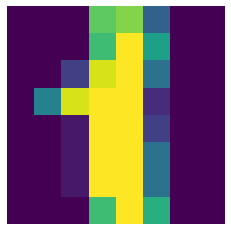

In [83]:
plt.imshow(ex1.images[1])
plt.axis('off')
plt.show()

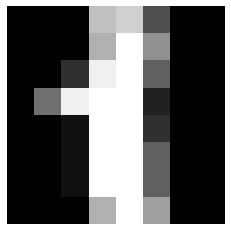

In [84]:
plt.imshow(ex1.data[1].reshape(8,8), cmap='gray')
plt.axis('off')
plt.show()

#### 데이터 이해하기
* Feature Data, Label Data 지정하기

In [85]:
ex1_data = ex1.data
ex1_label = ex1.target

In [86]:
ex1_data.shape, ex1_label.shape

((1797, 64), (1797,))

In [87]:
len(ex1.feature_names)

64

In [88]:
ex1_data[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

* Target Names 출력

In [89]:
 ex1.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [90]:
import pandas as pd
df1 = pd.DataFrame(data = ex1_data, columns = ex1.feature_names)

In [91]:
ex1_label

array([0, 1, 2, ..., 8, 9, 8])

In [92]:
df1['label'] = ex1_label

In [93]:
df1.label.value_counts().sort_index(ascending=True) # series상태에선 value_counts안됨..

0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
Name: label, dtype: int64

In [94]:
df1

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


#### train, test 분리

In [95]:
df1_xtrain, df1_xtest, df1_ytrain, df1_ytest = train_test_split(ex1_data, ex1_label,
                                                                test_size = 0.3, random_state = 7)

In [96]:
df1_xtrain.shape, df1_xtest.shape, df1_ytrain.shape, df1_ytest.shape

((1257, 64), (540, 64), (1257,), (540,))

#### 모델 학습

* Decision Tree

In [97]:
from sklearn.tree import DecisionTreeClassifier
ex1_tree = DecisionTreeClassifier()

In [98]:
ex1_tree.fit(df1_xtrain, df1_ytrain)

DecisionTreeClassifier()

In [99]:
ex1_pred1 = ex1_tree.predict(df1_xtest)

In [100]:
from sklearn.metrics import confusion_matrix

In [101]:
print(classification_report(df1_ytest, ex1_pred1))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        61
           1       0.77      0.80      0.79        55
           2       0.85      0.89      0.87        53
           3       0.78      0.77      0.78        52
           4       0.83      0.86      0.85        58
           5       0.92      0.94      0.93        48
           6       0.92      0.96      0.94        48
           7       0.76      0.80      0.78        49
           8       0.90      0.71      0.79        62
           9       0.77      0.81      0.79        54

    accuracy                           0.85       540
   macro avg       0.85      0.85      0.85       540
weighted avg       0.85      0.85      0.85       540



In [102]:
# 나름 데이터 분포는 균등한데 1, 3, 7, 8 의 분류 정확도가 낮음
# 2,3,8 곡면존재, 하지만 1,7은?
# precision : 판정중 실제 얼마?
# recall : 재현율?, 실제중 몇개 판정성공?

* Random Forest

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
ex1_random  = RandomForestClassifier()

In [105]:
ex1_random.fit(df1_xtrain, df1_ytrain)

RandomForestClassifier()

In [106]:
ex1_pred2 = ex1_random.predict(df1_xtest)

In [107]:
print(classification_report(df1_ytest, ex1_pred2))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        61
           1       0.95      1.00      0.97        55
           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        52
           4       0.92      0.98      0.95        58
           5       0.94      1.00      0.97        48
           6       1.00      0.98      0.99        48
           7       0.94      0.98      0.96        49
           8       1.00      0.89      0.94        62
           9       1.00      0.96      0.98        54

    accuracy                           0.97       540
   macro avg       0.97      0.98      0.97       540
weighted avg       0.98      0.97      0.97       540



In [ ]:
## random forest는 전체적으로 높은 정확도

* SVM

In [109]:
from sklearn import svm

In [113]:
ex1_svm = svm.SVC()

In [114]:
ex1_svm.fit(df1_xtrain, df1_ytrain)

SVC()

In [115]:
ex1_pred3 = ex1_svm.predict(df1_xtest)

In [116]:
print(classification_report(df1_ytest, ex1_pred3))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        61
           1       0.96      1.00      0.98        55
           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        52
           4       0.98      1.00      0.99        58
           5       0.98      1.00      0.99        48
           6       1.00      1.00      1.00        48
           7       0.98      1.00      0.99        49
           8       1.00      0.95      0.98        62
           9       1.00      0.98      0.99        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



* SGD Classifier

In [117]:
from sklearn.linear_model import SGDClassifier

In [118]:
ex1_sgd = SGDClassifier()

In [119]:
ex1_sgd.fit(df1_xtrain, df1_ytrain)

SGDClassifier()

In [120]:
ex1_pred4 = ex1_sgd.predict(df1_xtest)

In [121]:
print(classification_report(df1_ytest, ex1_pred4))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        61
           1       0.95      0.73      0.82        55
           2       1.00      1.00      1.00        53
           3       0.96      0.88      0.92        52
           4       0.97      0.97      0.97        58
           5       0.90      0.96      0.93        48
           6       0.98      0.96      0.97        48
           7       0.96      0.96      0.96        49
           8       0.83      0.95      0.89        62
           9       0.85      0.96      0.90        54

    accuracy                           0.94       540
   macro avg       0.94      0.94      0.94       540
weighted avg       0.94      0.94      0.93       540



* Logistic Regression

In [122]:
from sklearn.linear_model import LogisticRegression

In [123]:
ex1_logi = LogisticRegression()

In [124]:
ex1_logi.fit(df1_xtrain, df1_ytrain)

/home/jin/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [125]:
ex1_pred5 = ex1_logi.predict(df1_xtest)

In [126]:
print(classification_report(df1_ytest, ex1_pred5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       0.94      0.89      0.92        55
           2       0.96      1.00      0.98        53
           3       0.96      0.94      0.95        52
           4       0.98      0.97      0.97        58
           5       0.82      0.98      0.90        48
           6       0.98      0.98      0.98        48
           7       0.96      1.00      0.98        49
           8       0.95      0.84      0.89        62
           9       0.94      0.93      0.93        54

    accuracy                           0.95       540
   macro avg       0.95      0.95      0.95       540
weighted avg       0.95      0.95      0.95       540



* RandomForest가 가장 성능이 좋은듯?